In [1]:
!pip3 install pytimeparse

# **Read in basic data and distributions**

In [16]:
import pandas as pd
import matplotlib
import datetime
import pytimeparse
import matplotlib.pyplot as plt 
import numpy as np
from pandas.plotting._misc import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [17]:
input_csv = 'final_data_final.csv'
df = pd.read_csv(input_csv)
df = df.drop(columns = ['Unnamed: 0'])
df['average latency'] = df['average latency'].apply(lambda x: pytimeparse.timeparse.timeparse(x)/86400) #convert to days
#df['avg contributor per issue'] = df['avg contributor per issue'].apply(lambda x: 1 if x < 1 else x) #lower cap the number of avg contributor per issue to 1
#df['ratio'] = df['avg contributor per issue']/df['num_contributors']

contributors = df['num_contributors']
#print(f"Percentile of 1 in ratio is: {stats.percentileofscore(df['ratio'],1)}")

In [18]:
latency_cutoff = 120
total_issues_cutoff = 30
num_contributors_cutoff = 20

print(f"Percentile of {latency_cutoff} in Latency is: {stats.percentileofscore(df['average latency'],latency_cutoff)}")
print(f"Percentile of {total_issues_cutoff} in Total Issues is: {stats.percentileofscore(df['total issues'],total_issues_cutoff)}")
print(f"Percentile of {num_contributors_cutoff} in Number of Contributors is: {stats.percentileofscore(df['num_contributors'],num_contributors_cutoff)}")

Percentile of 120 in Latency is: 85.52746294681779
Percentile of 30 in Total Issues is: 84.85905260098808
Percentile of 20 in Number of Contributors is: 94.87067712874165


In [19]:
df

,url,num_contributors,total closed issued,total issues,avg contributor per issue,average latency,filename,Age,Avg Repos Outside Per contributor,Avg Forks Outside Per contributor
0,https://github.com/jayclassless/SteamBattleNet...,2.0,3.0,4.0,1.000000,20.035806,repositories_07_2016,1948,17.500000,2.5
1,https://github.com/dsccommunity/SecurityPolicy...,28.0,52.0,78.0,5.633333,157.418036,repositories_02_2016,2099,47.800000,35.2
2,https://github.com/mk2016/MKActionSheet.git,2.0,3.0,3.0,2.000000,3.035413,repositories_06_2016,1978,23.500000,16.0
3,https://github.com/ZhuangM/student.git,2.0,1.0,1.0,0.000000,0.000185,repositories_12_2016,1795,5.000000,3.5
4,https://github.com/gap-packages/francy.git,4.0,20.0,29.0,2.750000,102.429902,repositories_11_2016,1825,49.666667,42.0
...,...,...,...,...,...,...,...,...,...,...
3436,https://github.com/secML/secML.github.io.git,21.0,2.0,2.0,0.000000,0.133889,repositories_01_2018,1399,0.000000,0.0
3437,https://github.com/codeagon/Astral-TERA.git,1.0,1.0,1.0,1.000000,5.698356,repositories_04_2018,1309,14.000000,4.0
3438,https://github.com/mythmon/identicons.git,3.0,10.0,15.0,2.000000,45.060124,repositories_02_2018,1368,88.000000,60.5
3439,https://github.com/jimmyyhwu/ddsm-visual-primi...,3.0,3.0,3.0,1.000000,83.869869,repositories_04_2018,1309,0.000000,0.0


# **Distribution of each variable independently**

count    3441.000000
mean       62.590356
std       132.993896
min         0.000003
25%         2.260428
50%        16.024537
75%        63.007064
max      1716.148547
Name: average latency, dtype: float64


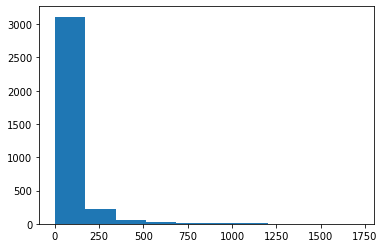

In [20]:
print(df['average latency'].describe())
plt.hist(df['average latency'])
plt.show()

count    3433.000000
mean       12.930232
std        15.464794
min         0.000000
25%         2.000000
50%         7.333333
75%        18.000000
max        98.000000
Name: Avg Forks Outside Per contributor, dtype: float64


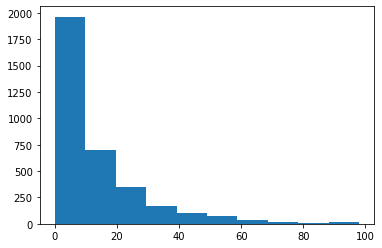

In [21]:
print(df['Avg Forks Outside Per contributor'].describe())
plt.hist(df['Avg Forks Outside Per contributor'])
plt.show()

count    3433.000000
mean       22.806978
std        21.890851
min         0.000000
25%         6.000000
50%        16.000000
75%        32.666667
max       100.000000
Name: Avg Repos Outside Per contributor, dtype: float64


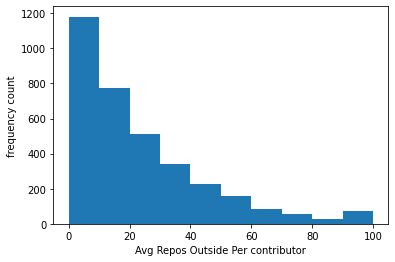

In [22]:
print(df['Avg Repos Outside Per contributor'].describe())
plt.hist(df['Avg Repos Outside Per contributor'])
plt.xlabel("Avg Repos Outside Per contributor")
plt.ylabel("frequency count")
plt.show()

In [23]:
print(f"Percentile of 90 in Number of Avg Repos outside is: {stats.percentileofscore(df['Avg Repos Outside Per contributor'],80)}")

Percentile of 90 in Number of Avg Repos outside is: 96.78872420807905


count     3441.000000
mean        11.321128
std        273.565231
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max      15995.000000
Name: num_contributors, dtype: float64


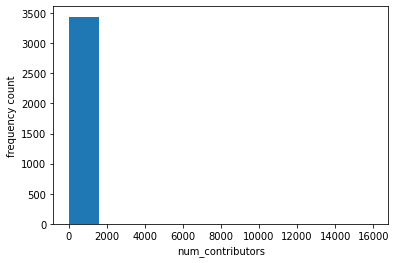

In [24]:
print(df['num_contributors'].describe())
plt.hist(df['num_contributors'])
plt.xlabel("num_contributors")
plt.ylabel("frequency count")
plt.show()

count    3441.000000
mean       16.660273
std        51.857900
min         1.000000
25%         1.000000
50%         3.000000
75%        11.000000
max      1040.000000
Name: total closed issued, dtype: float64


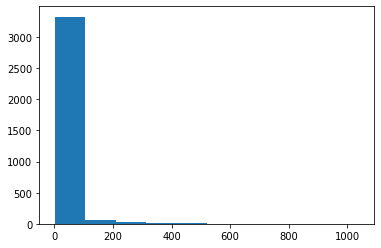

In [25]:
print(df['total closed issued'].describe())
plt.hist(df['total closed issued'])
plt.show()

count    3441.000000
mean       23.396106
std        71.089158
min         1.000000
25%         2.000000
50%         6.000000
75%        16.000000
max      1724.000000
Name: total issues, dtype: float64


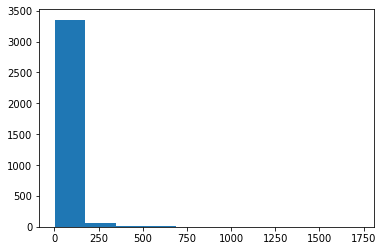

In [26]:
print(df['total issues'].describe())
plt.hist(df['total issues'])
plt.show()

count    3441.000000
mean     1211.444348
std       632.345189
min        60.000000
25%       578.000000
50%      1340.000000
75%      1733.000000
max      2130.000000
Name: Age, dtype: float64


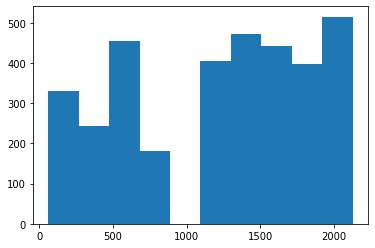

In [27]:
print(df['Age'].describe())
plt.hist(df['Age'])
plt.show()

In [28]:
scaler = MinMaxScaler()
Age = scaler.fit_transform(np.array(df['Age']).reshape((-1,1)))
df_describe = pd.DataFrame(Age)
df_describe.describe()

,0
count,3441.000000
mean,0.556253
std,0.305481
min,0.000000
25%,0.250242
50%,0.618357
75%,0.808213
max,1.000000


In [29]:
df = df.loc[(0 < df['num_contributors']) \
            & (df['average latency'] <= latency_cutoff) \
            & (df['total issues'] <= total_issues_cutoff) & (df['num_contributors'] <= num_contributors_cutoff) \
            & (df['Avg Repos Outside Per contributor'] <= 90)]

df = df.reset_index(drop = True)
df

,url,num_contributors,total closed issued,total issues,avg contributor per issue,average latency,filename,Age,Avg Repos Outside Per contributor,Avg Forks Outside Per contributor
0,https://github.com/jayclassless/SteamBattleNet...,2.0,3.0,4.0,1.000000,20.035806,repositories_07_2016,1948,17.500000,2.500000
1,https://github.com/mk2016/MKActionSheet.git,2.0,3.0,3.0,2.000000,3.035413,repositories_06_2016,1978,23.500000,16.000000
2,https://github.com/ZhuangM/student.git,2.0,1.0,1.0,0.000000,0.000185,repositories_12_2016,1795,5.000000,3.500000
3,https://github.com/gap-packages/francy.git,4.0,20.0,29.0,2.750000,102.429902,repositories_11_2016,1825,49.666667,42.000000
4,https://github.com/hardware/nsd-dnssec.git,7.0,5.0,6.0,2.600000,5.215602,repositories_02_2016,2099,44.833333,31.166667
...,...,...,...,...,...,...,...,...,...,...
2377,https://github.com/fangxiaogang/WanAndroidxg.git,3.0,2.0,7.0,1.000000,0.537205,repositories_09_2018,1156,8.000000,3.000000
2378,https://github.com/codeagon/Astral-TERA.git,1.0,1.0,1.0,1.000000,5.698356,repositories_04_2018,1309,14.000000,4.000000
2379,https://github.com/mythmon/identicons.git,3.0,10.0,15.0,2.000000,45.060124,repositories_02_2018,1368,88.000000,60.500000
2380,https://github.com/jimmyyhwu/ddsm-visual-primi...,3.0,3.0,3.0,1.000000,83.869869,repositories_04_2018,1309,0.000000,0.000000


# **Combined distributions of each variable**

In [30]:
df = df.drop(['url','avg contributor per issue','Avg Forks Outside Per contributor'],axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63846e74d0>,
      dtype=object)

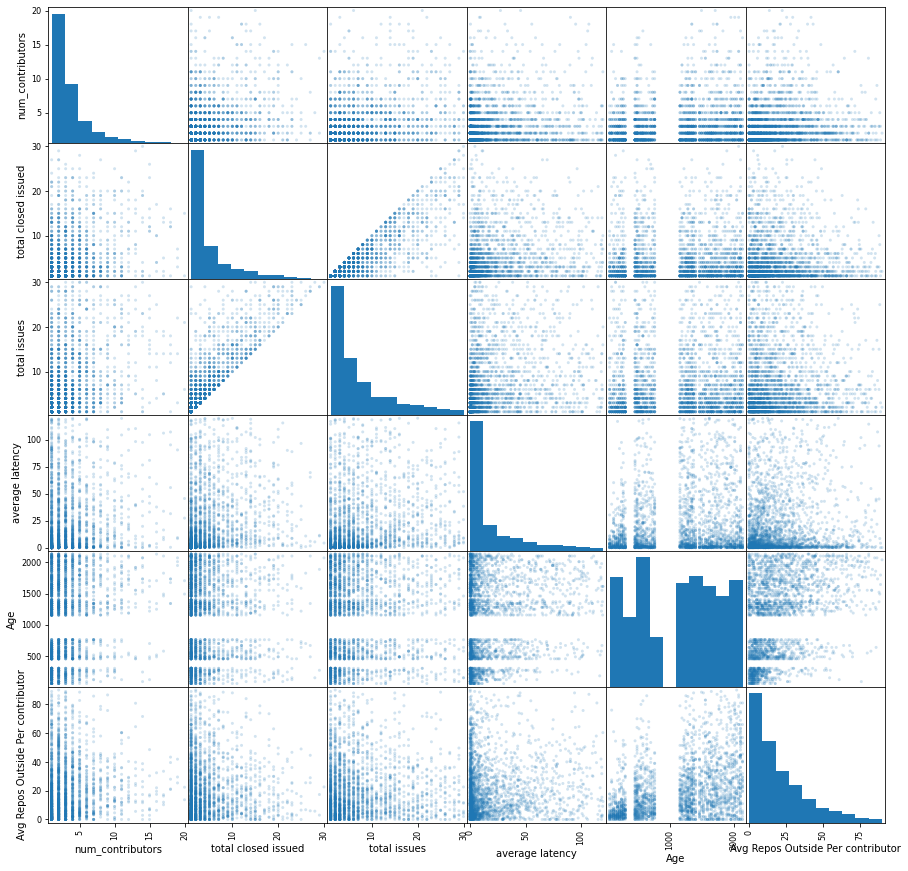

In [31]:
scatter_matrix(df, alpha=0.2, figsize=(15,15))

# **Again output vs input independent graphs**

count    2382.000000
mean       20.046158
std        27.816289
min         0.000003
25%         1.050395
50%         6.857156
75%        29.067695
max       119.927599
Name: average latency, dtype: float64


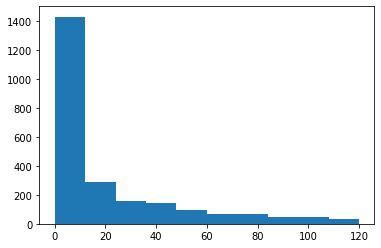

In [32]:
print(df['average latency'].describe())
plt.hist(df['average latency'])
plt.show()

count    2382.000000
mean       20.143718
std        19.023706
min         0.000000
25%         5.616667
50%        14.000000
75%        29.000000
max        90.000000
Name: Avg Repos Outside Per contributor, dtype: float64


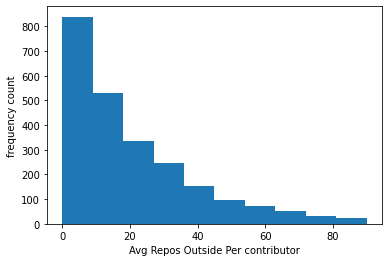

In [33]:
print(df['Avg Repos Outside Per contributor'].describe())
plt.hist(df['Avg Repos Outside Per contributor'])
plt.xlabel("Avg Repos Outside Per contributor")
plt.ylabel("frequency count")
plt.show()

count    2382.000000
mean        3.267422
std         2.980734
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        20.000000
Name: num_contributors, dtype: float64


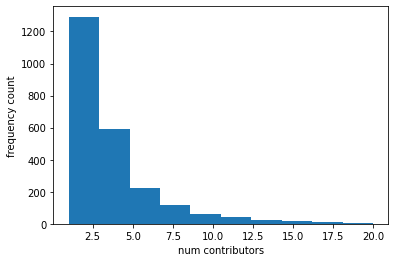

In [34]:
print(df['num_contributors'].describe())
plt.hist(df['num_contributors'])
plt.xlabel("num contributors")
plt.ylabel("frequency count")
plt.show()

count    2382.000000
mean        4.514694
std         5.057460
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        30.000000
Name: total closed issued, dtype: float64


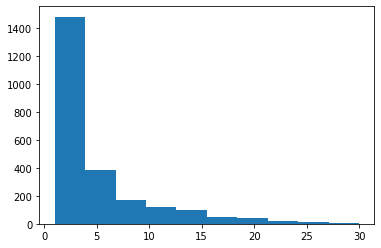

In [35]:
print(df['total closed issued'].describe())
plt.hist(df['total closed issued'])
plt.show()

count    2382.000000
mean        6.960537
std         6.865183
min         1.000000
25%         2.000000
50%         4.000000
75%        10.000000
max        30.000000
Name: total issues, dtype: float64


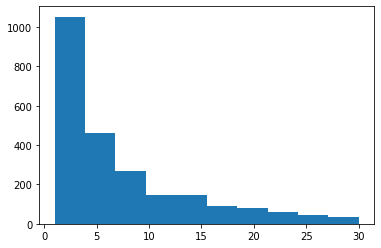

In [36]:
print(df['total issues'].describe())
plt.hist(df['total issues'])
plt.show()

# **Each input vs Output graph**

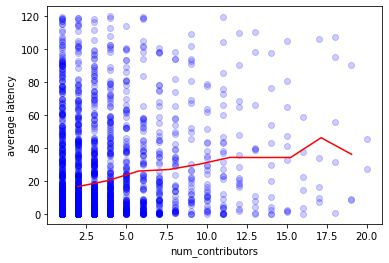

In [37]:
x = df['num_contributors']
y = df['average latency']

nbins = 10

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plt.plot(x, y, 'bo', alpha = .2)
plt.errorbar((_[1:] + _[:-1])/2, mean, fmt='r-')
plt.xlabel('num_contributors')
plt.ylabel('average latency')
plt.show()


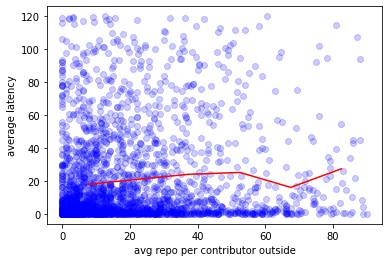

In [38]:
x = df['Avg Repos Outside Per contributor']
y = df['average latency']

nbins = 6

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plt.plot(x, y, 'bo', alpha = .2)
plt.xlabel('avg repo per contributor outside')
plt.ylabel('average latency')

plt.errorbar((_[1:] + _[:-1])/2, mean, fmt='r-')
plt.show()

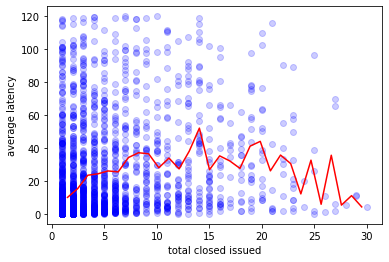

In [39]:
x = df['total closed issued']
y = df['average latency']

nbins = 30

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plt.plot(x, y, 'bo', alpha = .2)
plt.errorbar((_[1:] + _[:-1])/2, mean, fmt='r-')
plt.xlabel('total closed issued')
plt.ylabel('average latency')
plt.show()

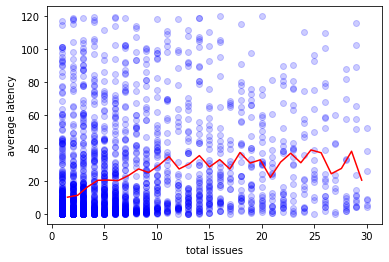

In [40]:
x = df['total issues']
y = df['average latency']

nbins = 30

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plt.plot(x, y, 'bo', alpha = .2)
plt.errorbar((_[1:] + _[:-1])/2, mean, fmt='r-')
plt.xlabel('total issues')
plt.ylabel('average latency')
plt.show()

# **Regression Results**

In [53]:
import statsmodels.api as sm
feats = ['num_contributors','Avg Repos Outside Per contributor','total closed issued']#,'Age']#,'total issues']#'Age']#,'total issues']#,'Age']#,'total closed issued']#,'total issues']#'avg contributor per issue']#,"Age"]
X = df[feats]
y = df['average latency']

#pre-process the features and the output

X = X.astype(float)
X_or = X
X = sm.add_constant(X)

<Figure size 1080x1080 with 0 Axes>

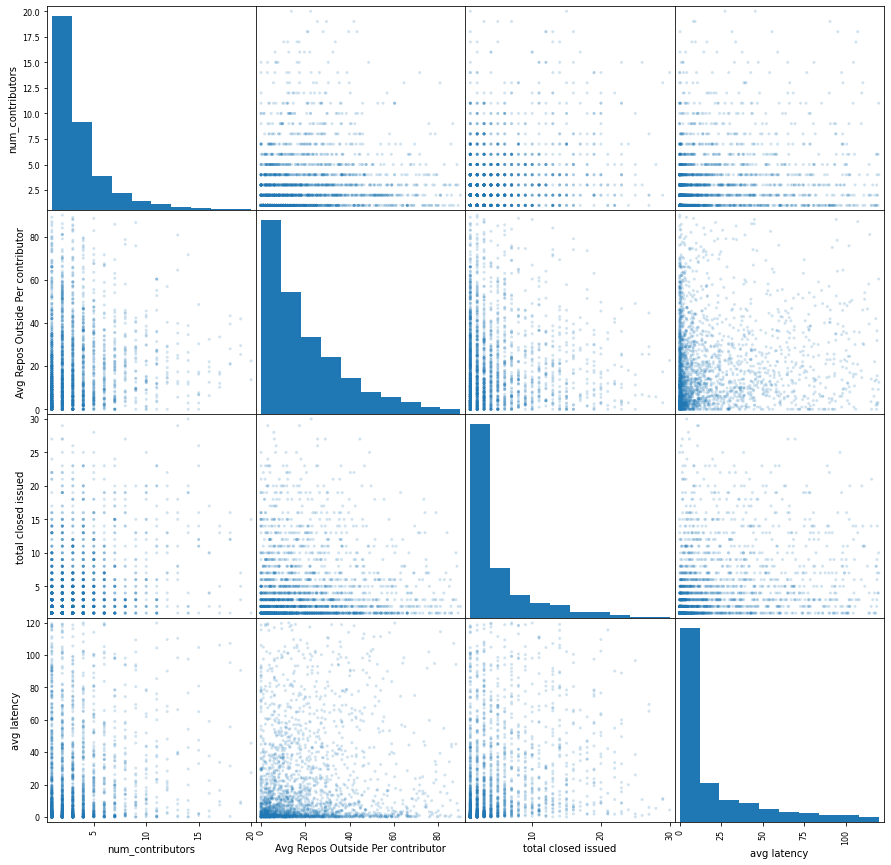

In [54]:
X_or['avg latency'] = y
plt.figure(figsize=(15,15))
scatter_matrix(X_or,alpha=0.2, figsize=(15,15))
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
model = sm.OLS(y,X)
results = model.fit()
print("TOTAL MSE: ",results.mse_total)
print(results.summary())

TOTAL MSE:  773.7459540323662
                            OLS Regression Results                            
Dep. Variable:        average latency   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     76.10
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           5.32e-47
Time:                        12:56:53   Log-Likelihood:                -11192.
No. Observations:                2382   AIC:                         2.239e+04
Df Residuals:                    2378   BIC:                         2.241e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------